# **Proyek Akhir: Predictive Analysis**

---

## Dicoding Submission
## Machine Learning Terapan

---

Kriteria submission:
- Project merupakan hasil pekerjaan sendiri.
- Project belum pernah digunakan untuk submission kelas Machine Learning di Dicoding dan belum pernah dipublikasikan di platform manapun.
- Dataset yang dipakai merupakan data kuantitatif (minimum 500 sampel data).
- Memberikan **dokumentasi** menggunakan **text cell** pada notebook (.ipynb) untuk menjelaskan **setiap tahapan proyek**.
- Menentukan solusi permasalahan menggunakan pendekatan machine learning atau deep learning dengan memilih salah satu dari penyelesaian berikut:
  - Klasifikasi
  - Regresi
  - Clustering
  - Time series dan forecasting
- Membuat draf laporan proyek machine learning yang menjelaskan alur proyek Anda dari mulai pemilihan domain permasalahan (problem domain), data understanding, data preparation, modeling, hingga tahap evaluasi. Ketentuan draf laporan proyek machine learning dapat Anda lihat pada sub modul berikutnya tentang **Detail Laporan**.

---

Saran:
- Menerapkan Rubrik/Kriteria Penilaian (Tambahan) untuk mendapatkan skala penilaian (bintang) yang lebih tinggi.

---

Tips:
- Menerapkan **Rubrik/Kriteria Penilaian (Tambahan)** untuk mendapatkan skala penilaian (bintang) yang lebih tinggi.
- Anda dapat memilih salah satu proyek dari domain (namun tidak terbatas pada daftar) berikut:
  - Kesehatan
  - Ekonomi dan bisnis
  - Keuangan
  - Pertanian dan peternakan
  - Pendidikan
  - Lingkungan
  - Astronomi
  - Kelautan
  - Sosial
  - Telekomunikasi
  - dsb.

---

Detail penilaian submission:
- **Bintang 1**: Semua ketentuan terpenuhi, tetapi terdapat indikasi plagiat dengan menggunakan proyek orang lain dan hanya mengubah kontennya saja.
- **Bintang 2**: Semua ketentuan terpenuhi, tetapi penulisan kode dan laporan berantakan.
- **Bintang 3**: Semua ketentuan terpenuhi, penulisan kode, dan laporan cukup baik.
- **Bintang 4**: Semua ketentuan terpenuhi, menerapkan minimal tiga (3) kriteria **Rubrik Penilaian Tambahan** pada laporan.
- **Bintang 5**: Semua ketentuan terpenuhi, menerapkan minimal **seluruh kriteria (6) Rubrik Penilaian Tambahan** pada laporan.

---

# Data Diri

- Nama: Sandy Susanto
- E-mail: susantosandy12@gmail.com
- Beasiswa : IDCamp2023

---
---

# **1. *Library Import***

In [ ]:
#Import library
import os
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor



*   *Library* [`os`](https://docs.python.org/3/library/os.html) berfungsi untuk berinteraksi dengan sistem operasi. Kegunaan dari *library* ini di antaranya dapat melakukan operasi seperti mengubah direktori kerja, menghapus file, dan membaca variabel lingkungan.
*   *Library* [`pandas`](https://pandas.pydata.org/) merupakan *library* analisis data yang kuat yang menyediakan struktur data seperti DataFrame untuk memudahkan manipulasi dan analisis data. *Library* ini bisa menggunakannya untuk membersihkan, menjelajah, dan memproses dataset.
*   [`Tensorflow`](https://www.tensorflow.org/) adalah *library machine learning* yang dikembangkan oleh Google. Digunakan untuk membuat dan melatih model neural network, yang bisa digunakan dalam berbagai aplikasi seperti pengenalan suara, terjemahan bahasa, dan penglihatan komputer.
*   [`Seaborn`](https://seaborn.pydata.org/) adalah *library* visualisasi data berbasis matplotlib yang menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.
*   [`matplotlib.pyplot`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) adalah modul dalam *library* matplotlib yang menyediakan fungsi untuk membuat berbagai jenis plot dan visualisasi data.
*   [`matplotlib.image`](https://matplotlib.org/stable/api/image_api.html) adalah modul yang digunakan untuk membaca, menulis, dan memanipulasi gambar dalam berbagai format sehingga sangat berguna dengan data visual seperti gambar atau foto.






# **2. *Data Loading***

## 2.1 *Kaggle Credential*

**Menghubungkan environtment** [`Colab`](https://colab.research.google.com/) dengan [Kaggle Dataset](https://kaggle.com/) menggunakan `Kaggle.json` yang didapatkan dari meng-*generate* [Kaggle API](https://www.kaggle.com/docs/api) token.

---
Gunakan `!python` untuk mengecek versi [`pyhton`](https://www.python.org/) di [`Colab`](https://colab.research.google.com/) dan memakai `!gdown` untuk men*download* `Kaggle.json` yang disimpan di [Google Drive](https://drive.google.com/)



In [ ]:
#Cek python dulu
!python --version

Python 3.10.12


In [ ]:
#Download Kaggle Credential
!pip install -q kaggle
!pip install --upgrade gdown
!gdown 1-78YSIrsevhJCtAsWGp2D6j189CdGP76
file = open("kaggle.json", "r")
data = file.read()
print(data)

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1-78YSIrsevhJCtAsWGp2D6j189CdGP76
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 228kB/s]
{"username":"sandysan0","key":"7e6b624e4c76074c4193eb154e7b7d80"}


Membuat *environtment* di `/root` dan mengetest *Kaggle API Command*

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod u=rw,g=,o= ~/.kaggle/kaggle.json
!ls ~/.kaggle
!kaggle datasets list

kaggle.json
ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                           Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          11027        208  1.0              
nbroad/gemma-rewrite-nbroad                                  gemma-rewrite-nbroad                                 8MB  2024-03-03 04:52:39            550         59  1.0              
arnavvvvv/spotify-music                                      Top Spotify Songs                                   47KB  2024-03-06 05:20:29           2328         45  1.0              
tarunrm09/climate-change-indicators                          Climate

## 2.2 *Dataset Download*

**Mengunduh *dataset***  dari *Kaggle*. *Dataset* yang digunakan adalah [Car Price Prediction Challenge](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge) dalam bentuk `.csv` ([Comma-separated Values](https://en.wikipedia.org/wiki/Comma-separated_values)).

In [ ]:
!kaggle datasets download -d deepcontractor/car-price-prediction-challenge

  0% 0.00/429k [00:00<?, ?B/s]
100% 429k/429k [00:00<00:00, 112MB/s]


Mengekstrak *file* zip dengan [`zipfile`](https://docs.python.org/3/library/zipfile.html)

In [ ]:
import zipfile
with zipfile.ZipFile('car-price-prediction-challenge.zip','r') as zip:
  zip.extractall('/content/')

**Menampilkan *dataset*** dengan *library* [Pandas](https://pandas.pydata.org/) lalu mengubah formatnya dari CSV menjadi *dataframe*.

In [ ]:
car = pd.read_csv('/content/car_price_prediction.csv')
car

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


## 2.3 *Dataset Preparation*

Menghapus kolom yang tidak ada digunakan karena tidak relevan, sama saja dengan kolom lain, dan tidak menjelaskan apapun, yaitu `ID`, `Levy`, `Manufacturer`, `Model`, dan `Prod. year`

In [ ]:
car.drop('ID'          , inplace=True, axis=1)
car.drop('Levy'        , inplace=True, axis=1)
car.drop('Manufacturer', inplace=True, axis=1)
car.drop('Model'       , inplace=True, axis=1)
car.drop('Prod. year'  , inplace=True, axis=1)
car

,Price,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


Menghilangkan tulisan 'km' dan mengubah tipe data menjadi `int64` dan `float64` supaya lebih mudah untuk melakukan prediksi

In [ ]:
car['Price'] = car['Price'].astype('float64')
car['Engine volume'] = car['Engine volume'].str.replace(' Turbo', '').astype('float64')
car['Mileage'] = car['Mileage'].str.replace(' km', '').astype('float64')
car['Cylinders'] = car['Cylinders'].astype('int64')

In [ ]:
car

,Price,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328.0,Jeep,Yes,Hybrid,3.5,186005.0,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621.0,Jeep,No,Petrol,3.0,192000.0,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467.0,Hatchback,No,Petrol,1.3,200000.0,4,Variator,Front,04-May,Right-hand drive,Black,2
3,3607.0,Jeep,Yes,Hybrid,2.5,168966.0,4,Automatic,4x4,04-May,Left wheel,White,0
4,11726.0,Hatchback,Yes,Petrol,1.3,91901.0,4,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467.0,Coupe,Yes,CNG,2.0,300000.0,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681.0,Sedan,Yes,Petrol,2.4,161600.0,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108.0,Jeep,Yes,Diesel,2.0,116365.0,4,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331.0,Jeep,Yes,Diesel,2.0,51258.0,4,Automatic,Front,04-May,Left wheel,Black,4


Dari *dataset* yang telah dibersihkan, terdapat 19.237 baris data dengan atribut sebanyak 13 kolom.

1. `Price` : Harga jual mobil dalam $
2. `Category` : Kategori mobil, seperti SUV, sedan, hatchback, dll
3. `Leather interior` : Menunjukkan apakah mobil memiliki interior kulit atau tidak.
4. `Fuel type` : Jenis bahan bakar yang digunakan mobil
5. `Engine volume` : Volume mesin mobil, diukur dalam liter
6. `Mileage` : Jarak tempuh mobil dalam KM
7. `Cylinders` : Jumlah silinder dalam mesin mobil.
8. `Gear box type` : Jenis kotak gigi/transmisi, seperti manual, otomatis, atau semi-otomatis.
9. `Drive wheels` : Jenis penggerak roda, seperti penggerak roda depan, belakang, atau semua roda.
10. `Doors` : Jumlah pintu pada mobil.
11. `Wheel` : Jenis roda yang digunakan, bisa juga merujuk pada *steering wheel* (kiri atau kanan).
12. `Color` : Warna eksterior mobil.
13. `Airbags` : Jumlah kantung udara keselamatan yang tersedia di mobil.


# **3. *Data Understanding***

## 3.1 *Exploratory Data Analysis* (EDA)

Exploratory Data Analysis (EDA) adalah proses investigasi awal pada data untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis, dan memeriksa asumsi dengan menggunakan statistik ringkasan dan representasi grafis.

### 3.1.1 Deskripsi Variabel

Melakukan pengecekan informasi dari *dataframe* `car`

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  float64
 1   Category          19237 non-null  object 
 2   Leather interior  19237 non-null  object 
 3   Fuel type         19237 non-null  object 
 4   Engine volume     19237 non-null  float64
 5   Mileage           19237 non-null  float64
 6   Cylinders         19237 non-null  int64  
 7   Gear box type     19237 non-null  object 
 8   Drive wheels      19237 non-null  object 
 9   Doors             19237 non-null  object 
 10  Wheel             19237 non-null  object 
 11  Color             19237 non-null  object 
 12  Airbags           19237 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 1.9+ MB


Terdapat 2 atribut dengan tipe data `int64`, 3 atribut dengan tipe data `float64` dan 8 atribut dengan tipe data `object`

### 3.1.2 Deskripsi Statistik

In [ ]:
car.describe()

,Price,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,1.855593e+04,2.307990,1.532236e+06,4.582991,6.582627
std,1.905813e+05,0.877805,4.840387e+07,1.199933,4.320168
min,1.000000e+00,0.000000,0.000000e+00,1.000000,0.000000
25%,5.331000e+03,1.800000,7.013900e+04,4.000000,4.000000
50%,1.317200e+04,2.000000,1.260000e+05,4.000000,6.000000
75%,2.207500e+04,2.500000,1.888880e+05,4.000000,12.000000
max,2.630750e+07,20.000000,2.147484e+09,16.000000,16.000000


Melihat deskripsi statistik dari *dataframe* `car` yaitu,
1.   `count` : Jumlah data
2.   `mean` : Rata-rata
3.   `std` : Standar deviasi/simpangan baku
4.   `min` : Nilai minimum
5.   `25%` : Kuartil bawah/Q1
6.   `50%` : Kuartil tengah/Q2/median
7.   `75%` : Kuartil atas/Q3
8.   `max` : Nilai maksimum

### 3.1.3 Menangani Missing Value

In [ ]:
pr =  (car['Price']         == 0).sum()
ev =  (car['Engine volume'] == 0).sum()
ml =  (car['Mileage']       == 0).sum()
cl =  (car['Cylinders']     == 0).sum()
ab =  (car['Airbags']       == 0).sum()

print("Nilai 0 di kolom price ada: ", pr)
print("Nilai 0 di kolom engine volume ada: ", ev)
print("Nilai 0 di kolom mileage ada: ", ml)
print("Nilai 0 di kolom cylinders ada: ", cl)
print("Nilai 0 di kolom airbags ada: ", ab)


Nilai 0 di kolom price ada:  0
Nilai 0 di kolom engine volume ada:  10
Nilai 0 di kolom mileage ada:  721
Nilai 0 di kolom cylinders ada:  0
Nilai 0 di kolom airbags ada:  2405


Ada **2405 kolom** *airbags* yang tidak diketahui. Oleh karena itu, data-data yang tidak diketahui akan dihilangkan dari *dataset*.

In [ ]:
car = car.loc[(car[['Mileage','Airbags']]!=0).all(axis=1)]

In [ ]:
car.shape

(16283, 13)

Mengecek ukuran data untuk memastikan data sudah dihilangkan

In [ ]:
car.head()

,Price,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328.0,Jeep,Yes,Hybrid,3.5,186005.0,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621.0,Jeep,No,Petrol,3.0,192000.0,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467.0,Hatchback,No,Petrol,1.3,200000.0,4,Variator,Front,04-May,Right-hand drive,Black,2
4,11726.0,Hatchback,Yes,Petrol,1.3,91901.0,4,Automatic,Front,04-May,Left wheel,Silver,4
5,39493.0,Jeep,Yes,Diesel,2.0,160931.0,4,Automatic,Front,04-May,Left wheel,White,4


### 3.1.4 Menangani *Outliers*

Untuk memeriksa keberadaan data yang menyimpang atau *outliers* dalam *dataframe* `car` dapat menggunakan visualisasi data berupa [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) yang dibantu oleh *library* [`seaborn`](https://seaborn.pydata.org/). *Outliers* adalah nilai-nilai yang sangat berbeda dari sebagian besar data dan bisa mempengaruhi hasil analisis secara keseluruhan. Visualisasi dengan `boxplot` memungkinkan kita untuk mengidentifikasi dan mengevaluasi *outliers* ini secara efektif.

<Axes: xlabel='Airbags'>

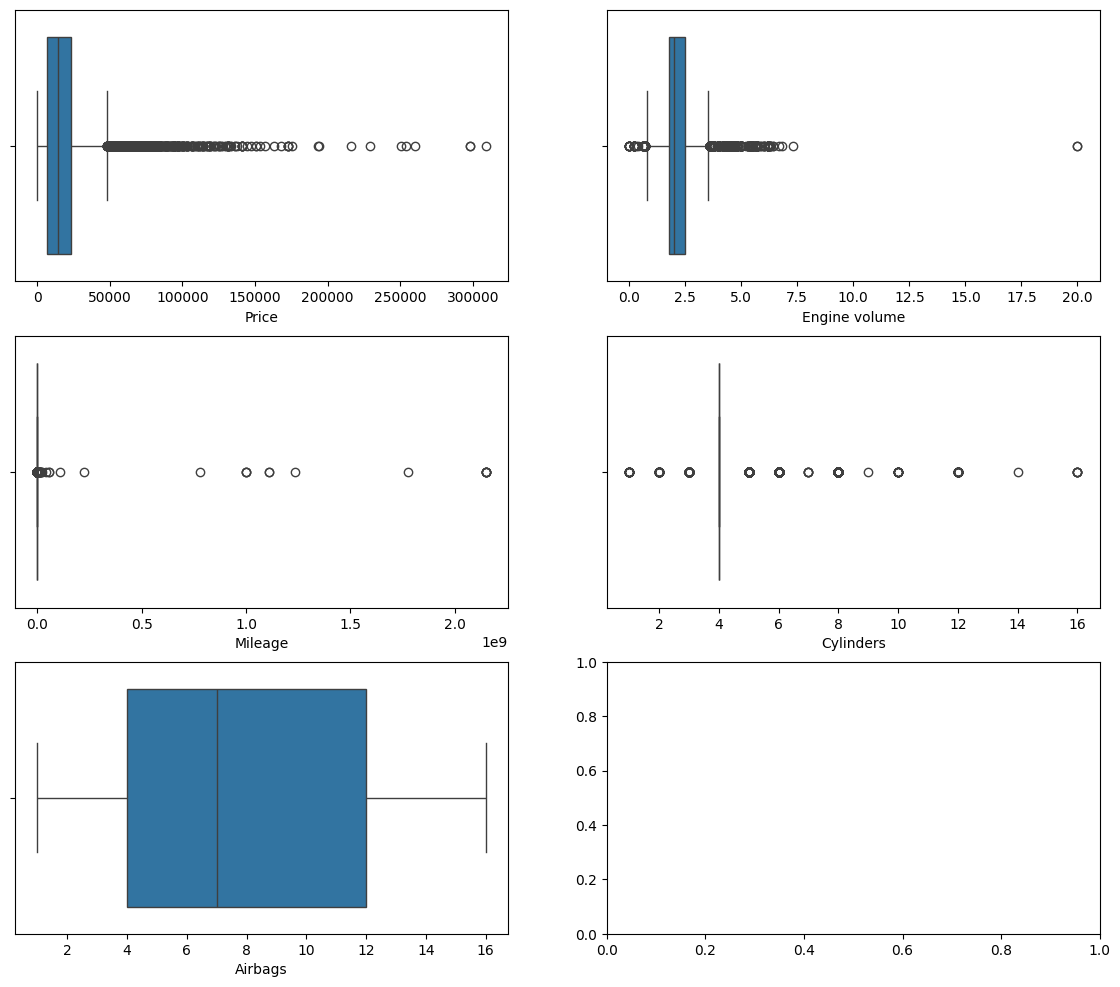

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
sns.boxplot(ax=axes[0,0], x=car['Price'])
sns.boxplot(ax=axes[0,1], x=car['Engine volume'])
sns.boxplot(ax=axes[1,0], x=car['Mileage'])
sns.boxplot(ax=axes[1,1], x=car['Cylinders'])
sns.boxplot(ax=axes[2,0], x=car['Airbags'])

Dari diagram boxplot yang ditampilkan, terlihat bahwa pada variabel numerik yang menunjukkan adanya nilai-nilai *outlier*, yaitu data yang jauh berbeda dari nilai-nilai lainnya dalam kumpulan data tersebut.

Untuk mengidentifikasi dan menangani *outliers*, pendekatan yang digunakan adalah metode IQR, atau *Inter Quartile Range*.

$$ IQR = Q3 - Q1 $$

Selanjutnya, batas bawah dan batas atas ditetapkan untuk mengelilingi *outliers*.

$$ \text{Batas Bawah} = Q1 - 1.5 \times IQR $$
$$ \text{Batas Atas} = Q3 + 1.5 \times IQR $$

Metode ini memungkinkan identifikasi nilai yang berada di luar jangkauan normal data.

In [ ]:
Q1 = car.quantile(0.25)
Q3 = car.quantile(0.75)
IQR = Q3 - Q1
car = car[~((car < (Q1 - 1.5*IQR)) | (car > (Q3 + 1.5*IQR))).any(axis=1)]

<ipython-input-18-737f094cc6eb>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = car.quantile(0.25)
<ipython-input-18-737f094cc6eb>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = car.quantile(0.75)
<ipython-input-18-737f094cc6eb>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  car = car[~((car < (Q1 - 1.5*IQR)) | (car > (Q3 + 1.5*IQR))).any(axis=1)]


Cek ukuran dataset setelah drop outliers

In [ ]:
car.shape

(11287, 13)

Diperoleh data yang telah dibersihkan sebanyak 11346 sampel.

<Axes: xlabel='Airbags'>

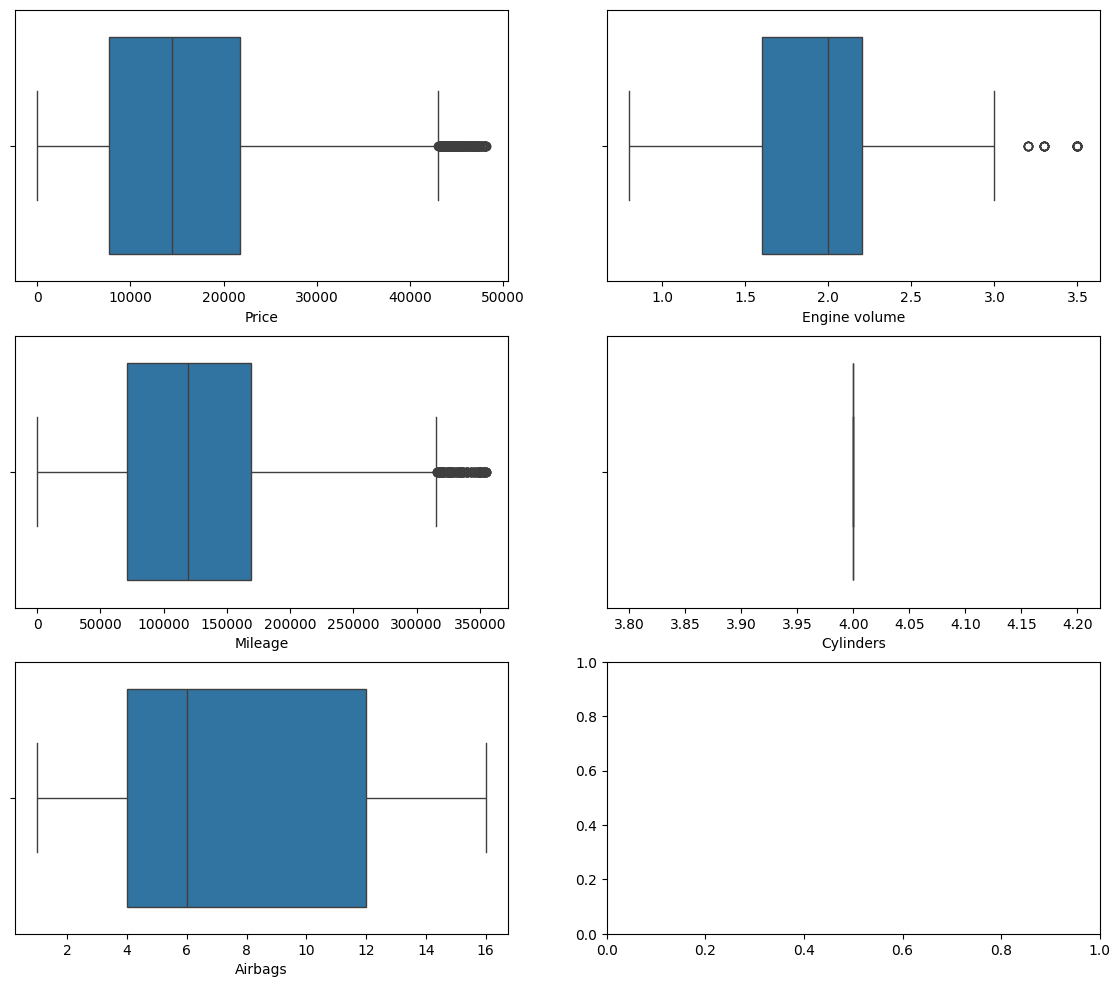

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
sns.boxplot(ax=axes[0,0], x=car['Price'])
sns.boxplot(ax=axes[0,1], x=car['Engine volume'])
sns.boxplot(ax=axes[1,0], x=car['Mileage'])
sns.boxplot(ax=axes[1,1], x=car['Cylinders'])
sns.boxplot(ax=axes[2,0], x=car['Airbags'])

Setelah membersihkan *outliers* dengan metode IQR, atau *Inter Quartile Range*, terlihat bahwa jumlah *outliers* pada boxplot telah menurun. Walaupun masih terdapat *outliers* pada variabel `price`, `engine volume`, dan `mileage`, nilai-nilai tersebut masih berada dalam rentang yang dianggap aman.

### 3.1.5 *Univariate Analysis*

Melaksanakan analisis data *univariate* terhadap variabel-variabel.

Membagi fitur pada dataset menjadi dua bagian

In [ ]:
car

,Price,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,8467.0,Hatchback,No,Petrol,1.3,200000.0,4,Variator,Front,04-May,Right-hand drive,Black,2
4,11726.0,Hatchback,Yes,Petrol,1.3,91901.0,4,Automatic,Front,04-May,Left wheel,Silver,4
5,39493.0,Jeep,Yes,Diesel,2.0,160931.0,4,Automatic,Front,04-May,Left wheel,White,4
6,1803.0,Hatchback,Yes,Hybrid,1.8,258909.0,4,Automatic,Front,04-May,Left wheel,White,12
7,549.0,Sedan,Yes,Petrol,2.4,216118.0,4,Automatic,Front,04-May,Left wheel,Grey,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467.0,Coupe,Yes,CNG,2.0,300000.0,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681.0,Sedan,Yes,Petrol,2.4,161600.0,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108.0,Jeep,Yes,Diesel,2.0,116365.0,4,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331.0,Jeep,Yes,Diesel,2.0,51258.0,4,Automatic,Front,04-May,Left wheel,Black,4


In [ ]:
numerical_features = ['Price', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
categorical_features = ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']

***Categorical Features***

             jumlah sampel  persentase
Sedan                 5290        46.9
Jeep                  2437        21.6
Hatchback             2150        19.0
Minivan                506         4.5
Universal              305         2.7
Coupe                  241         2.1
Goods wagon            169         1.5
Microbus               162         1.4
Pickup                  19         0.2
Cabriolet                7         0.1
Limousine                1         0.0


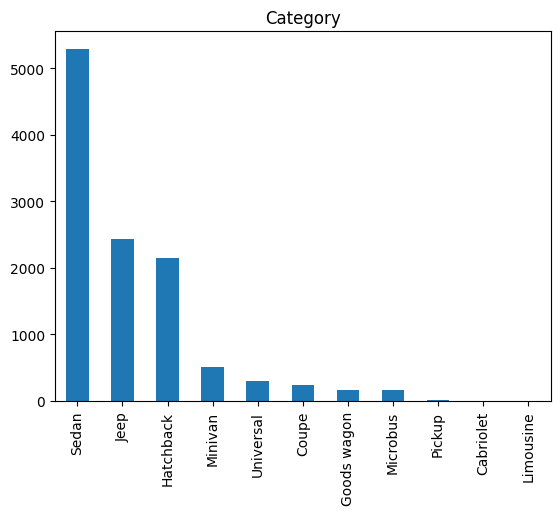

In [ ]:
feature = categorical_features[0]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Mayoritas mobil yang ada di pasar bertipe sedan

     jumlah sampel  persentase
Yes           7617        67.5
No            3670        32.5


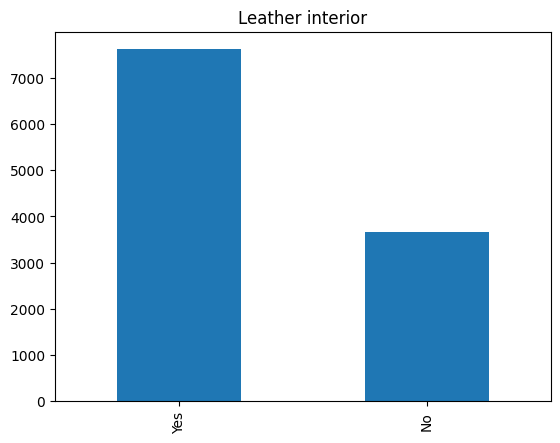

In [ ]:
feature = categorical_features[1]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Lebih dari **50%** mobil memiliki interior terbuat dari kulit

                jumlah sampel  persentase
Petrol                   5840        51.7
Diesel                   2508        22.2
Hybrid                   2175        19.3
LPG                       478         4.2
CNG                       210         1.9
Plug-in Hybrid             76         0.7


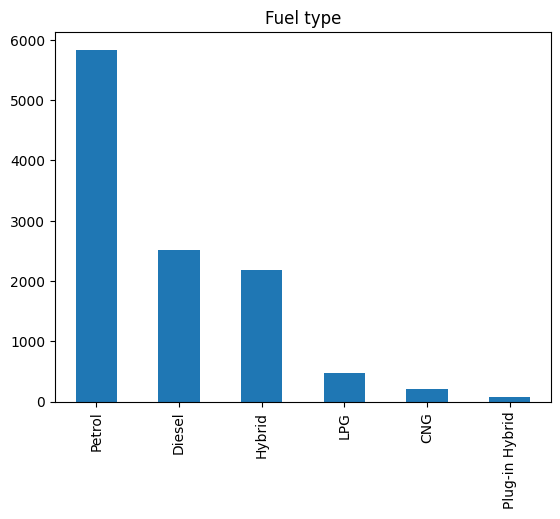

In [ ]:
feature = categorical_features[2]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Mayoritas mobil berbahan bakar petrol

           jumlah sampel  persentase
Automatic           8058        71.4
Tiptronic           1511        13.4
Manual              1117         9.9
Variator             601         5.3


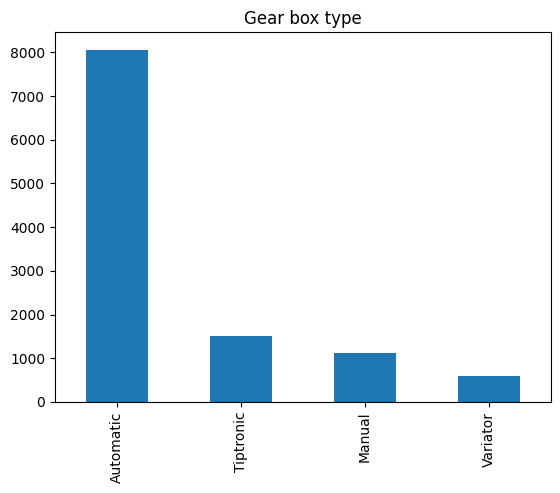

In [ ]:
feature = categorical_features[3]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Mobil matic lebih sering dijumpai di pasar

       jumlah sampel  persentase
Front           9711        86.0
4x4              889         7.9
Rear             687         6.1


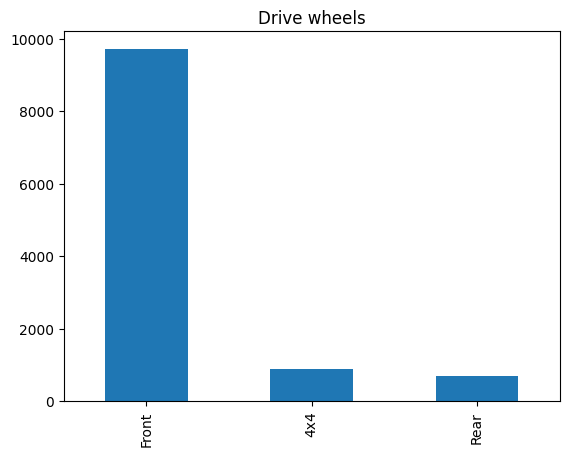

In [ ]:
feature = categorical_features[4]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Mobil dengan penggerak di depan lebih banyak

        jumlah sampel  persentase
04-May          10884        96.4
02-Mar            344         3.0
>5                 59         0.5


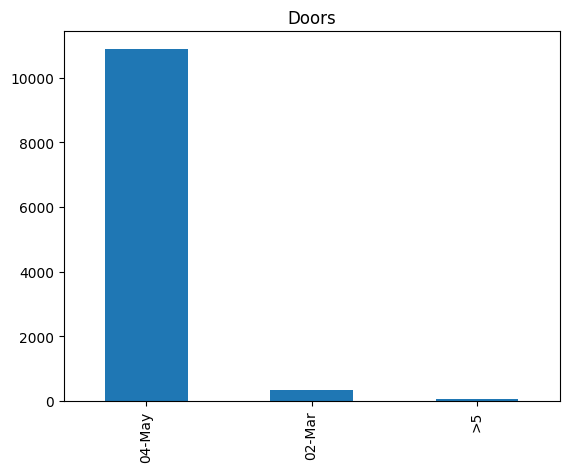

In [ ]:
feature = categorical_features[5]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Mobil dengan 4 pintu lebih banyak

                  jumlah sampel  persentase
Left wheel                10247        90.8
Right-hand drive           1040         9.2


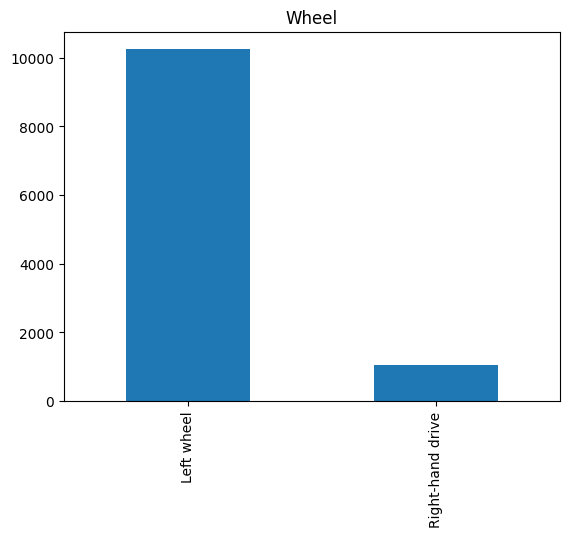

In [ ]:
feature = categorical_features[6]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Lebih banyak mobil dengan posisi stir di kiri

               jumlah sampel  persentase
White                   2805        24.9
Silver                  2482        22.0
Black                   2474        21.9
Grey                    1417        12.6
Blue                     831         7.4
Red                      436         3.9
Green                    164         1.5
Carnelian red            129         1.1
Brown                    107         0.9
Golden                    94         0.8
Sky blue                  92         0.8
Yellow                    81         0.7
Beige                     73         0.6
Orange                    66         0.6
Purple                    21         0.2
Pink                      15         0.1


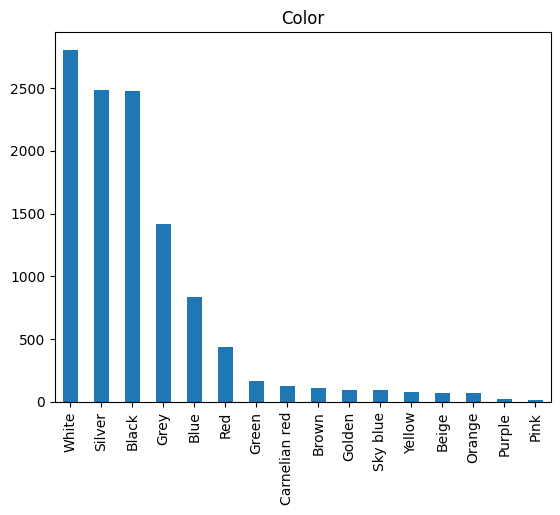

In [ ]:
feature = categorical_features[7]
count = car[feature].value_counts()
percent = 100*car[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Warna putih, silver, dan hitam mendominasi warna mobil di pasar

***Numerical Features***

Melihat histogram masing-masing fitur

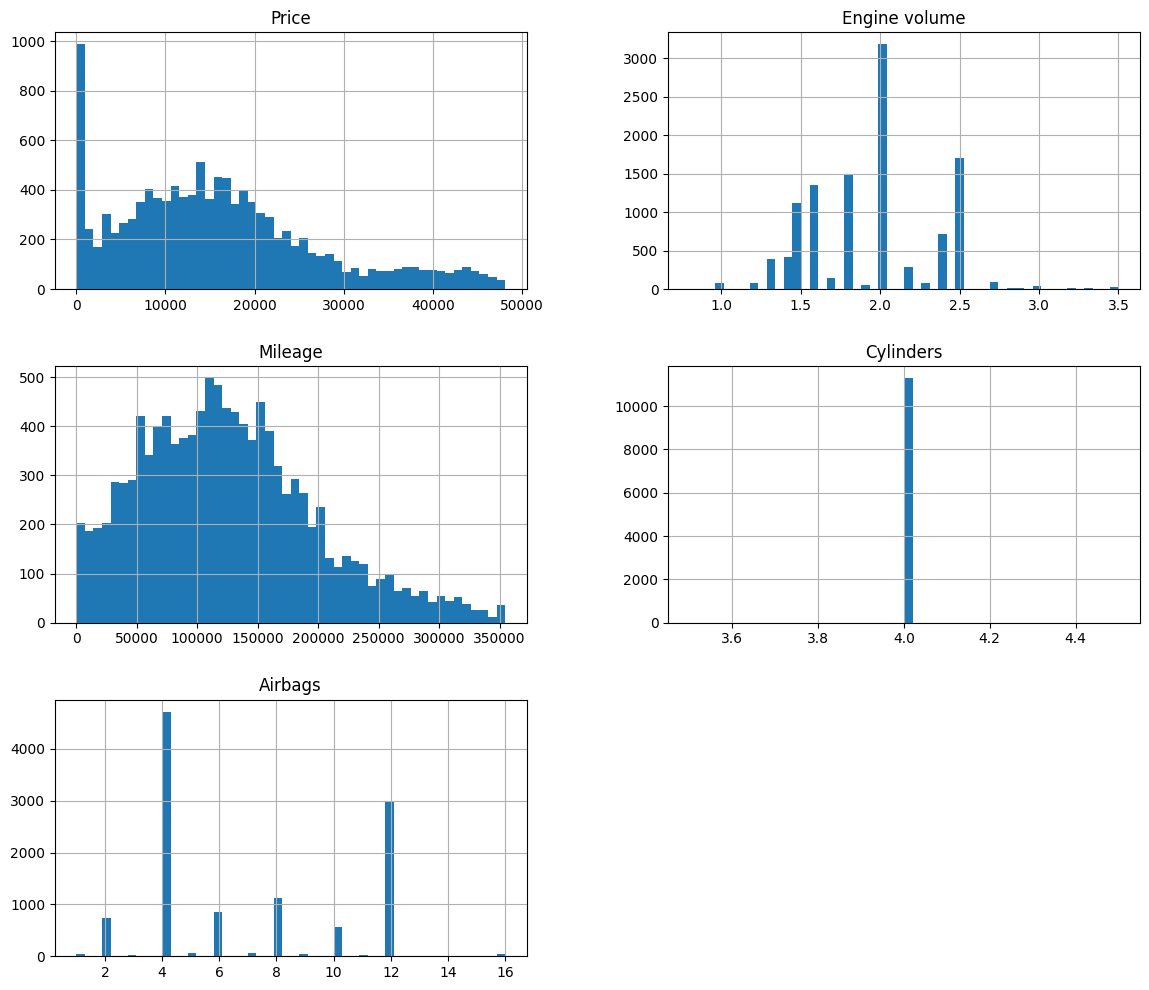

In [ ]:
car.hist(bins=50, figsize=(14,12))
plt.show()

Informasi yang dapat diketahui dari histogram di atas
*   Harga pasaran mobil berada di **<$1000**
*   Volume mesin kendaraan mobil umumnya 2 liter
*   Kendaraan bekas pakai mendominasi pasar mobil
*   Hampir semua mobil memiliki 4 silinder
*   Mayoritas jumlah *airbags* dalam mobil adalah 4


### 3.1.6 *Multivariate Analysis*

Melaksanakan analisis data *multivariate* terhadap variabel-variabel.

***Categorical Features***

Mengecek harga kendaraan terhadap masing-masing fitur

<ipython-input-32-d1ca7466209f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 4,  data=car, palette="Set3")
<ipython-input-32-d1ca7466209f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 4,  data=car, palette="Set3")
<ipython-input-32-d1ca7466209f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 4,  data=car, palette="Set3")
<ipython-input-32-d1ca

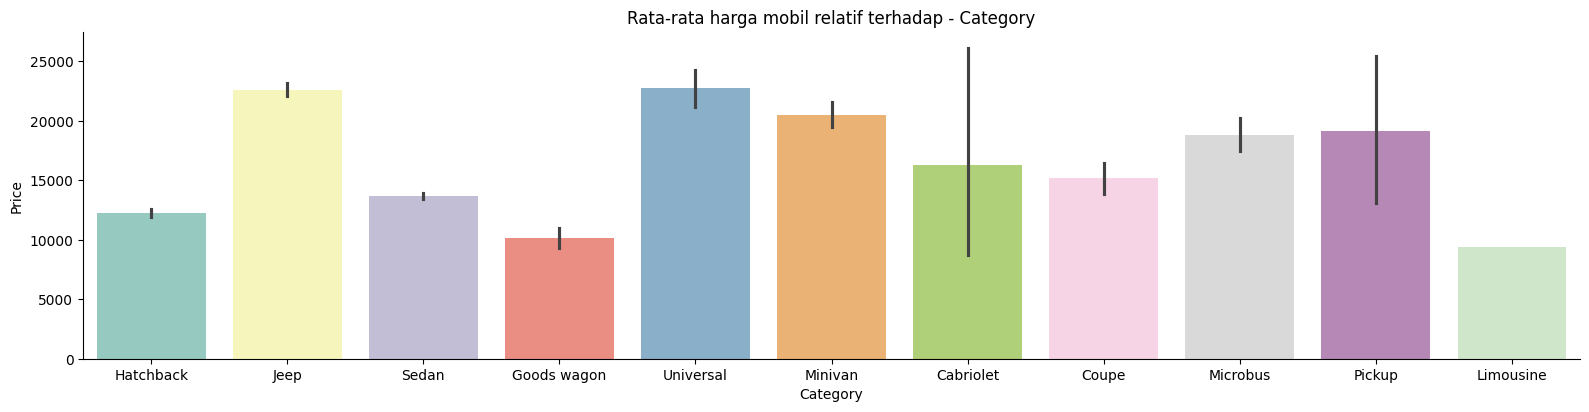

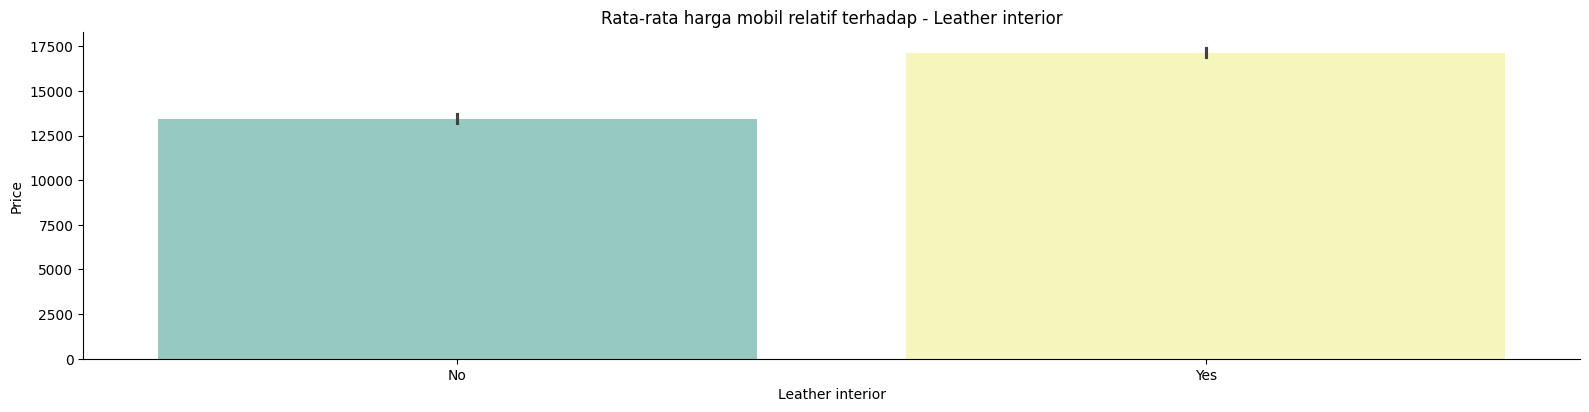

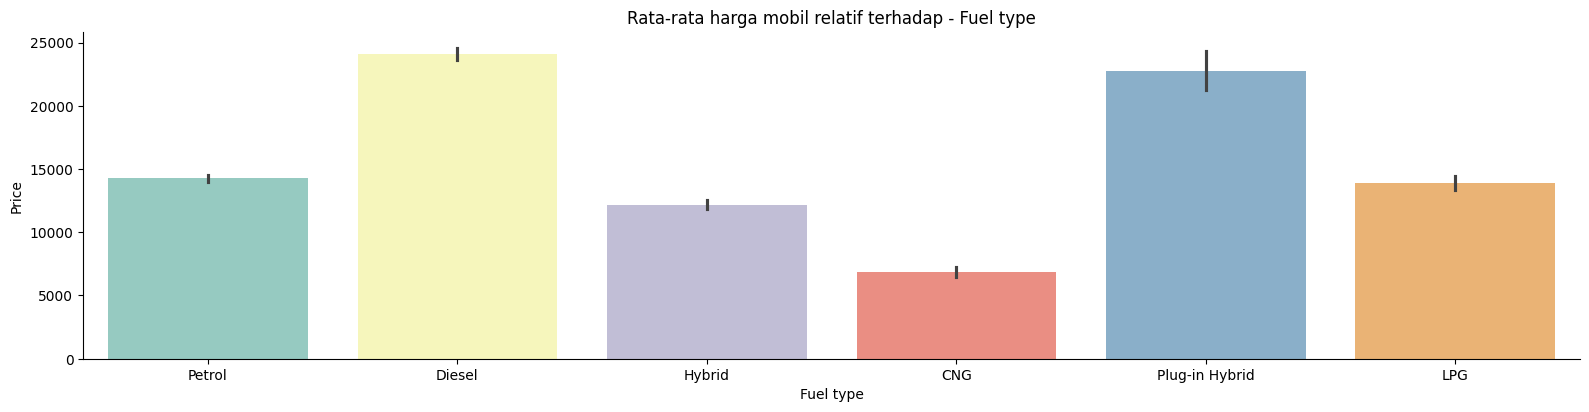

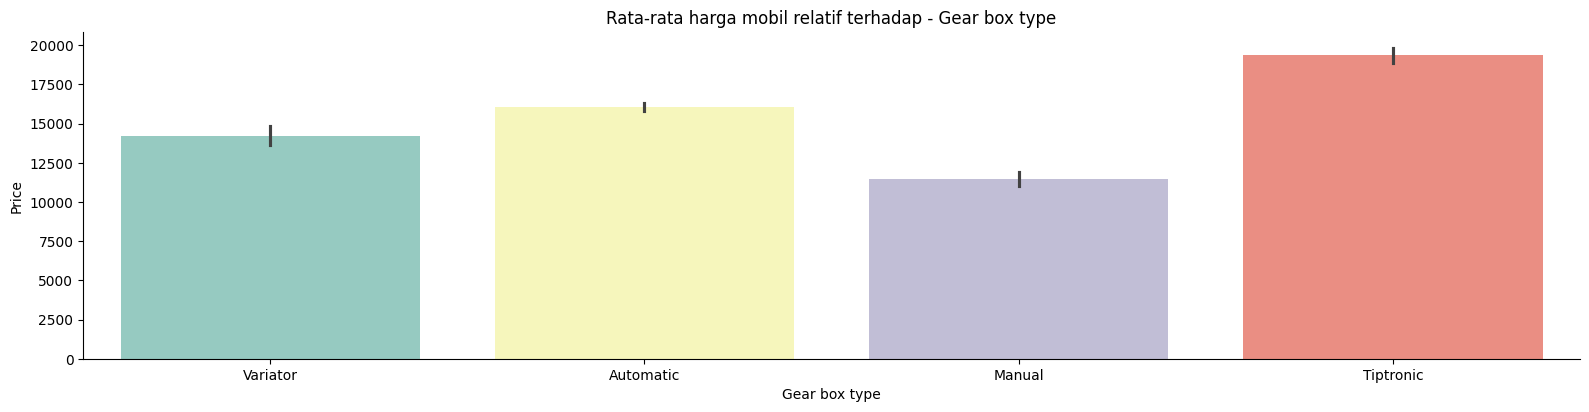

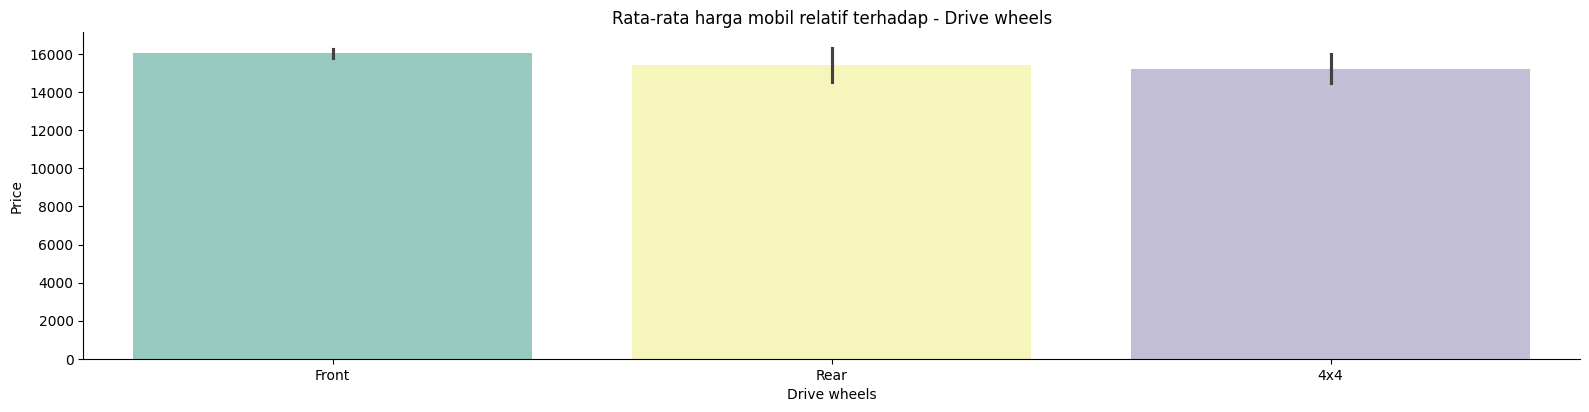

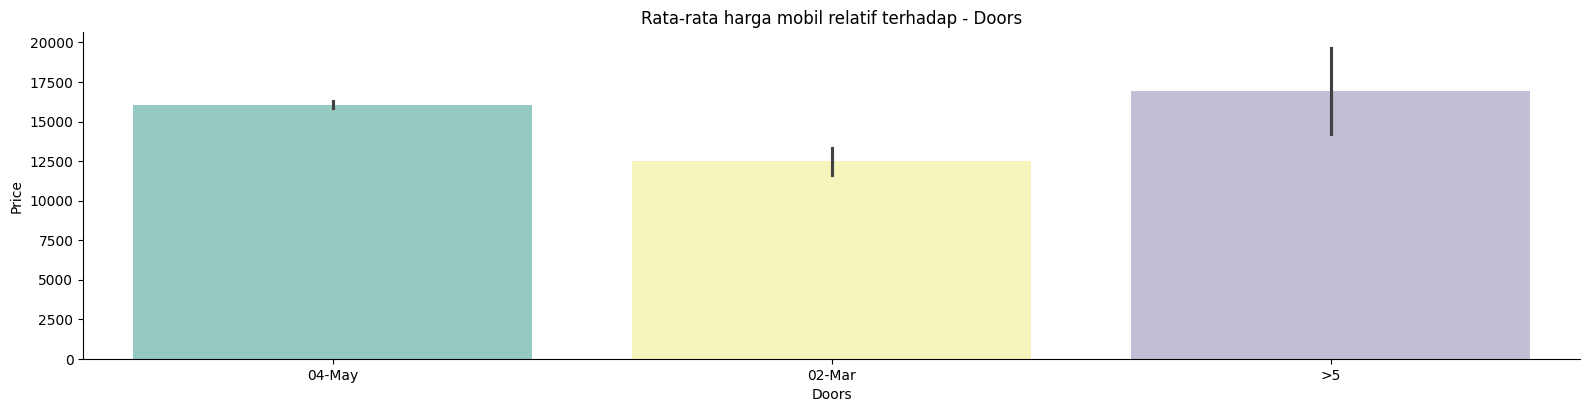

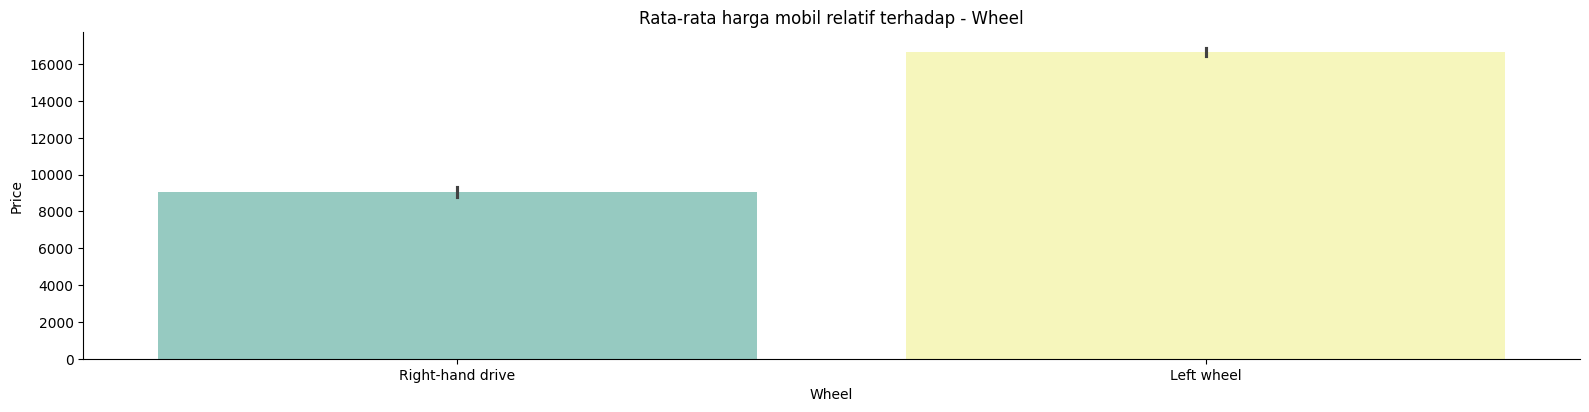

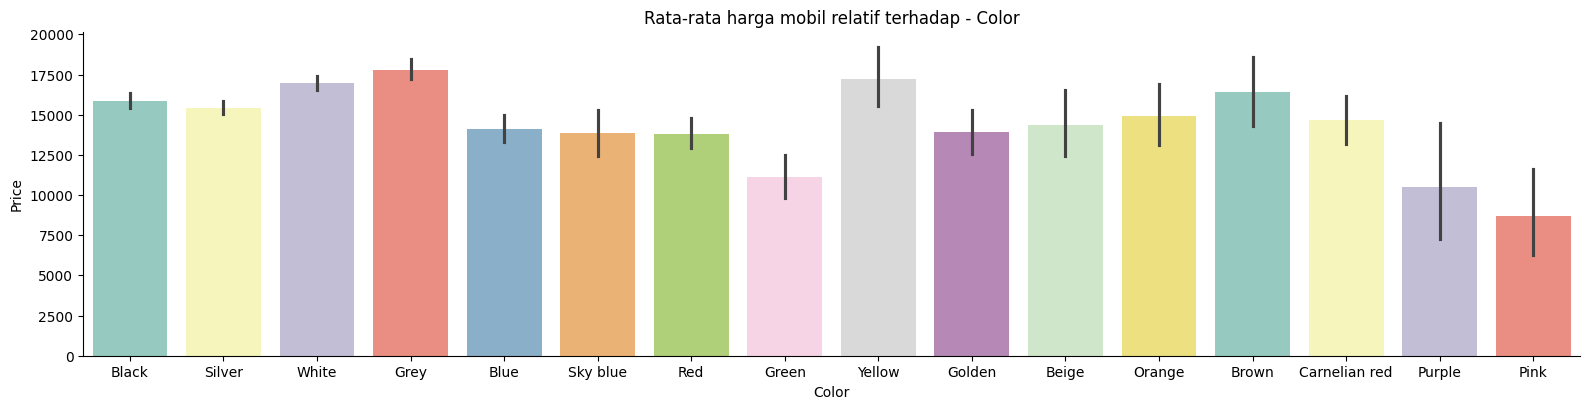

In [ ]:
cat_features = car.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 4,  data=car, palette="Set3")
  plt.title("Rata-rata harga mobil relatif terhadap - {}".format(col))

Informasi yang bisa didapatkan dari histogram di atas
*   Mobil bertipe Jeep dan Universal memiliki harga yang tertinggi dibandingkan dengan mobil lainnya
*   Mobil dengan interior kulit memiliki harga yang lebih mahal
*   Mobil dengan bahan bakar Diesel dan *Plug-in Hybrid* memiliki harga tertinggi dan sangat jauh gap harganya dengan mobil berbahan bakar CNG
*   Harga mobil yang *Gear box*-nya bertipe Tiptronic paling tinggi
*   Tidak ada perbedaan harga mobil berdasarkan roda penggeraknya
*   Mobil dengan pintu 2 memiliki harga yang jauh dangan pintu 4 dan pintu >5
*   Mobil stri kiri memiliki harga yang lebih mahal dibandingkan mobil stir kanan
*   Harga mobil berdasarkan warna memiliki banyak variasi. Mobil dengan warna *pink, purple*, dan *green* memiliki harga di bawah rata-rata



***Numerical Features***

Menggambarkan distribusi data untuk variabel numerik dalam *dataframe* `epower` menggunakan visualisasi. Ini dilakukan dengan memanfaatkan fungsi `pairplot` dari *library* `seaborn`, dengan menetapkan `diag_kind` ke `kde` untuk mengestimasi dan memvisualisasikan distribusi probabilitas dari setiap variabel numerik.

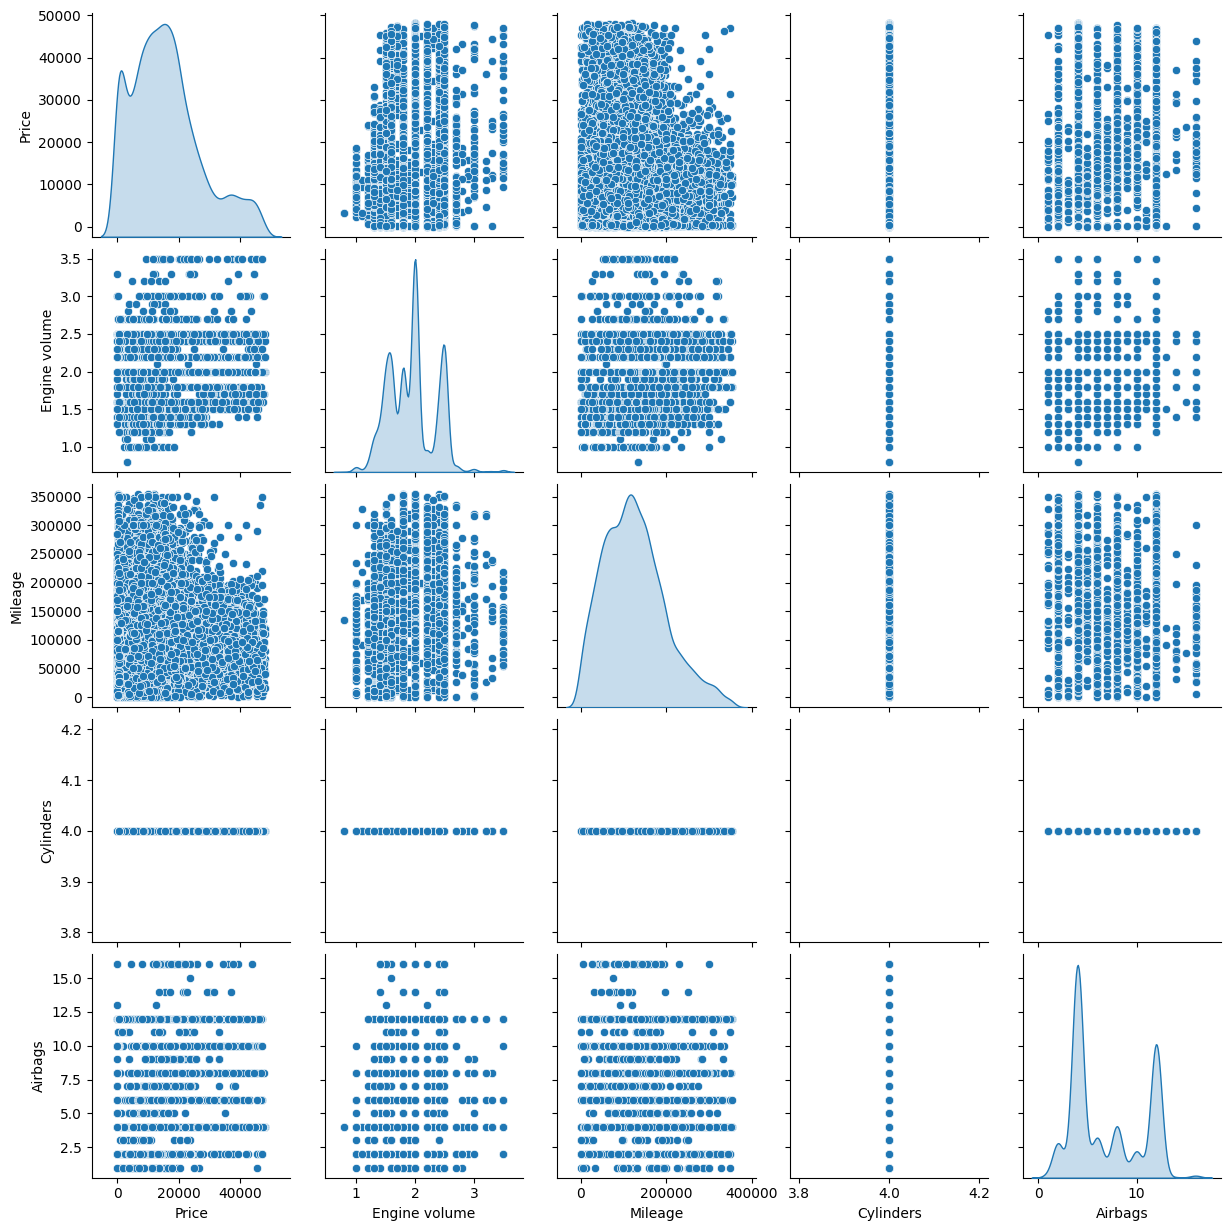

In [ ]:
sns.pairplot(car, diag_kind = 'kde')

### 3.1.7 *Correlation Matrix* menggunakan *Heatmap*

Mengkaji hubungan antara variabel numerik dengan memvisualisasikan matriks korelasi melalui diagram *heatmap*.

<ipython-input-34-13e917178bc3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = car.corr().round(2)


Text(0.5, 1.0, 'Matriks Korelasi untuk Fitur Numerik')

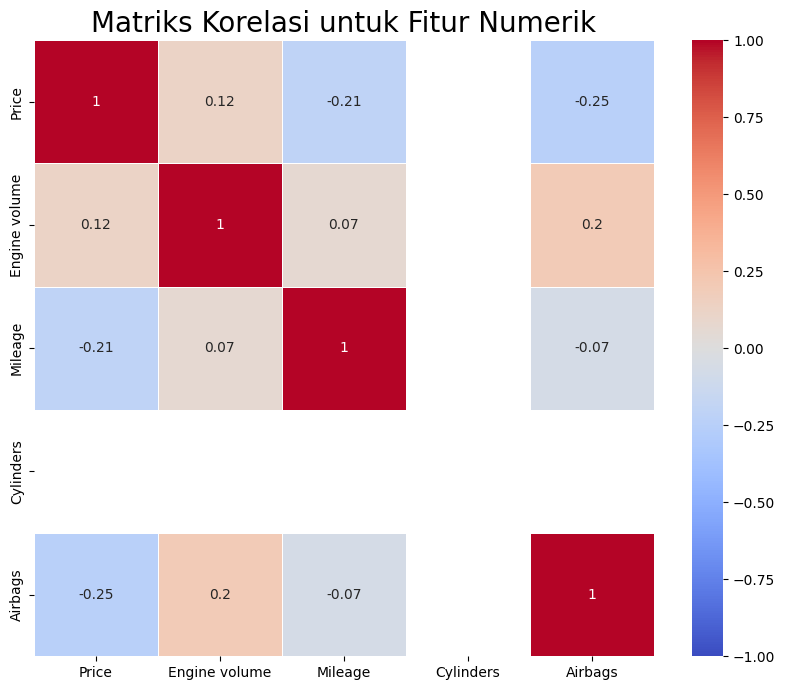

In [ ]:
#mengevaluasi skor korelasi
fig = plt.figure(figsize=(10, 8))
corr_matrix = car.corr().round(2)

# Membuat heatmap untuk matriks korelasi
heatmap = sns.heatmap(
    corr_matrix,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    annot=True,
    linewidths=0.5
)

heatmap.set_title('Matriks Korelasi untuk Fitur Numerik', fontsize=20)


Diagram *heatmap* yang ditampilkan memiliki angka 1 dan 0.05, yang mengindikasikan tingkat korelasi antara variabel numerik dengan cara berikut:
- Nilai yang mendekati 1 menandakan adanya korelasi positif yang kuat antara dua variabel, di mana keduanya cenderung meningkat secara bersamaan.
- Nilai yang mendekati 0 menunjukkan bahwa tidak ada korelasi yang signifikan antara dua variabel.
- Nilai yang mendekati -1 menunjukkan korelasi negatif yang kuat, di mana satu variabel cenderung meningkat sementara yang lainnya menurun.

### 3.1.8 Analisis Korelasi Antar Fitur

Fitur `Price` memiliki korelasi yang cukup kuat dengan `Engine Volume`.

Sehingga, fitur `Mileage`, `Cylinders`, dan `Airbags`yang memiliki korelasi rendah dapat dilakukan *drop* (menghapus) untuk menghilangkan fitur-fitur tersebut.

In [ ]:
car.drop(['Mileage'],   inplace=True, axis=1)
car.drop(['Cylinders'], inplace=True, axis=1)
car.drop(['Airbags'],   inplace=True, axis=1)

In [ ]:
car

,Price,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color
2,8467.0,Hatchback,No,Petrol,1.3,Variator,Front,04-May,Right-hand drive,Black
4,11726.0,Hatchback,Yes,Petrol,1.3,Automatic,Front,04-May,Left wheel,Silver
5,39493.0,Jeep,Yes,Diesel,2.0,Automatic,Front,04-May,Left wheel,White
6,1803.0,Hatchback,Yes,Hybrid,1.8,Automatic,Front,04-May,Left wheel,White
7,549.0,Sedan,Yes,Petrol,2.4,Automatic,Front,04-May,Left wheel,Grey
...,...,...,...,...,...,...,...,...,...,...
19232,8467.0,Coupe,Yes,CNG,2.0,Manual,Rear,02-Mar,Left wheel,Silver
19233,15681.0,Sedan,Yes,Petrol,2.4,Tiptronic,Front,04-May,Left wheel,Red
19234,26108.0,Jeep,Yes,Diesel,2.0,Automatic,Front,04-May,Left wheel,Grey
19235,5331.0,Jeep,Yes,Diesel,2.0,Automatic,Front,04-May,Left wheel,Black


# **4. *Data Preparation***

## 4.1 Encoding Fitur Kategori

Dalam proses pengkodean untuk variabel kategori, teknik yang sering digunakan adalah [*`one-hot-encoding`*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Fungsi ini tersedia dalam library [*`scikit-learn`*](https://scikit-learn.org/), yang memungkinkan transformasi variabel kategori menjadi fitur-fitur baru yang dapat merepresentasikan informasi kategorikal dengan tepat.

In [ ]:
#One-hot-encoding
car = pd.concat([car, pd.get_dummies(car['Category'], prefix='Category')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Leather interior'], prefix='Leather interior')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Fuel type'], prefix='Fuel type')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Gear box type'], prefix='Gear box type')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Drive wheels'], prefix='Drive wheels')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Doors'], prefix='Doors')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Wheel'], prefix='Wheel')],axis=1)
car = pd.concat([car, pd.get_dummies(car['Color'], prefix='Color')],axis=1)
car.drop(['Category','Leather interior','Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'], axis=1, inplace=True)

In [ ]:
car

,Price,Engine volume,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
2,8467.0,1.3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11726.0,1.3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,39493.0,2.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1803.0,1.8,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,549.0,2.4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467.0,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19233,15681.0,2.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,26108.0,2.0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19235,5331.0,2.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.2 Train-Test-Split

Membagi dataset menjadi data latih (*train*) dan data uji (*test*)

In [ ]:
X = car.drop(["Price"],axis =1)
y = car["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 11287
Total # of sample in train dataset: 10158
Total # of sample in test dataset: 1129


## 4.3 Standarisasi pada Fitur Numerik

Melakukan standarisasi nilai pada fitur numerik dengan menggunakan `StandardScaler` dari *library* `scikit-learn`. Proses standarisasi ini bertujuan untuk mencegah terjadinya penyimpangan nilai data yang cukup besar.

In [ ]:
numericalFeatures = ['Engine volume']

scaler = StandardScaler()
scaler.fit(X_train[numericalFeatures])
X_train[numericalFeatures] = scaler.transform(X_train.loc[:, numericalFeatures])
X_train[numericalFeatures].head()

,Engine volume
6366,0.153905
9749,-1.374810
16382,-1.120024
8293,0.153905
7297,-1.120024


## 4.4 Reduksi Dimensi

Reduksi dimensi adalah metode yang digunakan untuk mengurangi jumlah variabel dalam data sambil memastikan informasi penting tetap terjaga. Salah satu metode reduksi dimensi yang sering digunakan adalah *Principal Component Analysis*, atau PCA. Teknik ini mengurangi dimensi data dengan mengubahnya dari ruang berdimensi n menjadi ruang berdimensi m yang lebih rendah, di mana m lebih kecil dari n, tanpa kehilangan esensi data tersebut.

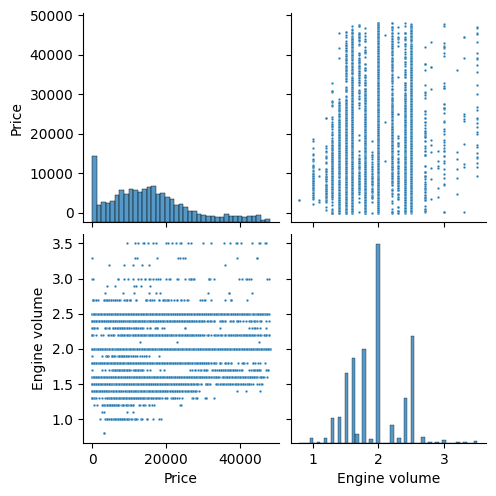

In [ ]:
sns.pairplot(car[['Price','Engine volume']], plot_kws={"s": 3});

Aplikasikan [*`class PCA`*](https://scikit--learn-org.translate.goog/stable/modules/generated/sklearn.decomposition.PCA.html?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=tc) dari library *`scikit learn`*

In [ ]:
pca = PCA(n_components=2, random_state=123)
pca.fit(car[['Price','Engine volume']])
princ_comp = pca.transform(car[['Price','Engine volume']])

Mengetahui proporsi informasi dari kedua komponen

In [ ]:
#Proporsi informasi
pca.explained_variance_ratio_.round(3)

array([1., 0.])

In [ ]:
car

,Price,Engine volume,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
2,8467.0,1.3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11726.0,1.3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,39493.0,2.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1803.0,1.8,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,549.0,2.4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467.0,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19233,15681.0,2.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,26108.0,2.0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19235,5331.0,2.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **5. *Model Development***

## 5.1 *Model Preparation*

Menyiapkan *dataframe* untuk analisis model menggunakan `index` yang terdiri dari `train_mse` dan `test_mse`, serta `columns` yang mencakup algoritma prediksi seperti [`K-Nearest Neighbor (KNN)`](https://www.geeksforgeeks.org/k-nearest-neighbours/), [`Random Forest`](https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,Decision%20trees), dan [`Adaptive Boosting (AdaBoost)`](https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/#:~:text=AdaBoost%20algorithm%2C%20short%20for%20Adaptive,assigned%20to%20incorrectly%20classified%20instances.).

In [ ]:
models = pd.DataFrame(
    index=['train_mse', 'test_mse'],
    columns=['KNN', 'RandomForest', 'Boosting']
    )

## 5.2 *K-Nearest Neighbor (KNN) Algorithm*

*Algoritma K-Nearest Neighbor (KNN)* beroperasi berdasarkan prinsip kesamaan antara sampel data uji dan data latih, dengan membandingkan fitur-fitur yang ada. KNN melakukan ini dengan menghitung jarak antara sampel uji dengan setiap sampel latih dan memilih sejumlah tetangga terdekat yang ditentukan oleh nilai k, yang merupakan bilangan bulat positif.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## *5.3 Random Forest Algorithm*

*Random Forest* adalah sebuah algoritma pembelajaran terawasi (*supervised learning*) yang berada dalam kategori pembelajaran ansambel (*ensemble group learning*). Ini berarti bahwa *Random Forest* membangun sejumlah model prediktif yang bekerja secara mandiri. Hasil dari masing-masing model ini kemudian dikombinasikan untuk menghasilkan prediksi akhir yang lebih kuat dan akurat.

In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## 5.4 *Adaptive Boosting (AdaBoost) Algorithm*

*Adaptive Boosting*, atau AdaBoost, adalah teknik yang secara bertahap melatih model dalam serangkaian iterasi. Setiap data dalam set pelatihan diawali dengan bobot yang seragam, dan setelah setiap iterasi, model mengevaluasi kinerjanya. Data yang diklasifikasikan secara tidak tepat mendapatkan peningkatan bobot, memfokuskan model pada kasus yang lebih sulit di iterasi berikutnya. Proses ini berulang sampai model mencapai tingkat akurasi yang optimal.

In [ ]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# **6. *Model Evaluation***

Evaluasi model regresi pada dasarnya cukup mudah dipahami. Pada intinya, sebagian besar metrik evaluasi memiliki prinsip yang serupa. Performa model dianggap baik jika prediksi yang dihasilkan dekat dengan nilai aktual. Sebaliknya, dianggap kurang baik jika jauh dari nilai aktual. Perbedaan antara nilai yang diprediksi dan nilai aktual dikenal sebagai kesalahan prediksi. Oleh karena itu, tujuan utama dari semua metrik adalah untuk mengukur dan meminimalkan kesalahan prediksi tersebut.

In [ ]:
# Terapkan normalisasi pada data numerik dalam X_test agar nilai rata-ratanya menjadi nol dan variansnya satu
X_test.loc[:, numericalFeatures] = scaler.transform(X_test[numericalFeatures])

Evaluasi performa tiga model pembelajaran mesin: *K-Nearest Neighbor, Random Forest*, dan *AdaBoost*, pada set data pelatihan dan pengujian dengan mengukur tingkat kesalahan mereka melalui *Mean Squared Error* (MSE).

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3


In [ ]:
mse

,train,test
KNN,68297.597252,73106.450998
RF,54229.526255,66362.343771
Boosting,93556.535026,91402.194147


Tampilkan prediksi *error* dari model *K-Nearest Neighbor, Random Forest*, dan *AdaBoost* untuk data pelatihan dan pengujian menggunakan diagram batang.

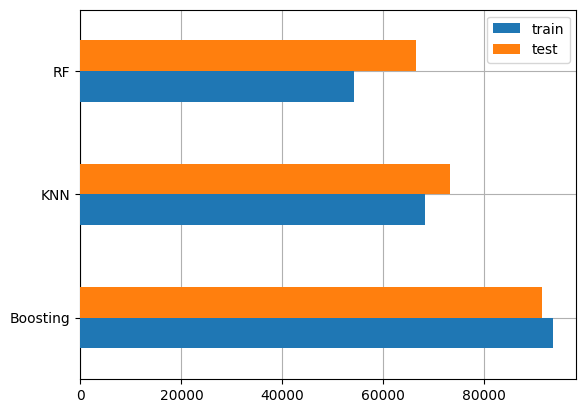

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Berdasarkan diagram yang ditampilkan, dapat diketahui:
1.   Algoritma *Random Forest* menghasilkan nilai *error* terendah.
2.   Algoritma *K-Nearest Neighbor* menunjukkan tingkat *error* yang berada di tengah-tengah dibandingkan dengan dua algoritma lain.
3.   Algoritma *Adaptive Boosting* memiliki tingkat *error* tertinggi.

Melakukan pengujian prediksi dengan menggunakan harga (*price*) dari data uji (*testing*)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
21,20698.0,17346.6,17318.4,13694.7


Dapat dilihat prediksi pada model dengan algoritma *K-Nearest Neighbor* memberikan hasi yang paling mendekati dengan nilai `y_true` jika dibandingkan dengan algoritma model yang lainnya.

Nilai `y_true` sebesar **20698.0** dan nilai prediksi `*K-Nearest Neighbor*` sebesar **17346.6**.

Meskipun diagram `MSE` menunjukan *Random Forest* memiliki error paling kecil dibanding algoritma lainnya, ketika dilakukan pengujian justru *K-Nearest Neighbor* menghasilkan prediksi yang lebih mendekati `y_true`. Nilai *error* dari *Random Forest* dan *K-Nearest Neighbor* tidak terlampau jauh dan angkanya masih dalam puluh ribuan, sehingga *gap* hasil prediksi kedua algoritma tersebut pada dataset ini tidak terlalu berbeda jauh.